# Topic : How does the round off error affect the reliablity of the simulation nonlinear dynamical system?

You can get details in [My website](https://munjungkim.github.io/post/lorenz_wheel/)

Here, we are going to solve the Lorenz equation of Malkus-wheel with RK-4 (4th order Runge-Kutta)

-----

$w(t)$ : angular velocity of the water wheel

$\theta$ : angular velocity of the water wheel

$Q(\theta)$ : The rate at which water is pumped in. (Note : This function is independent with time $t$.

$r$ : radius of the wheel

$m(\theta,t)$ : mass distribution of water around rim

-----

and after some calculation (see the website), we have to calcualate


----
$\dot{a_1} : -Ka_1 + wb_1$

$\dot{b_1} : q_1 - Kb_1 - wa_1$

$I\dot{w} = -vw + gra_1\pi$

----

where $a_n(t)$ and $b_n(t)$ are coefficients of the fourier series of $m(\theta,t)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Malkus_function import Malkus
from RK4 import *
from Lorenz_function import Lorenz
from tqdm import tqdm

# Lorenz system

In [73]:
p_list_lorenz= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,3000)

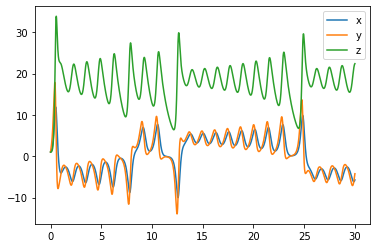

In [75]:
plt.plot(p_list_lorenz[1],p_list_lorenz[0][0],label='x')
plt.plot(p_list_lorenz[1],p_list_lorenz[0][1],label='y')
plt.plot(p_list_lorenz[1],p_list_lorenz[0][2],label='z')
plt.legend()


In [44]:
p_list_malkus[0][2][3000]

22.40954286673684

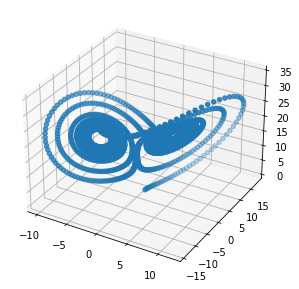

In [42]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0][0,:],p_list_malkus[0][1,:],p_list_malkus[0][2,:])

In [43]:
s=5
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

bifurcation point should be 15.0


# Bifurcation

In [55]:
bifurcate_w = []
r_list = np.linspace(0,99,100)
for rho in tqdm(r_list):
    Lorenz_temp = Lorenz(s=5,r=rho,b=1)
    p_list_malkus= RK4_3variable(1,1,1,Lorenz(s=5,r=rho,b=1).Lorenz_func,0.01,3000)[0]
    bifurcate_w.append(p_list_malkus[2][3000])
    

100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


In [82]:
s=5
print(s)
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

5
bifurcation point should be 15.0


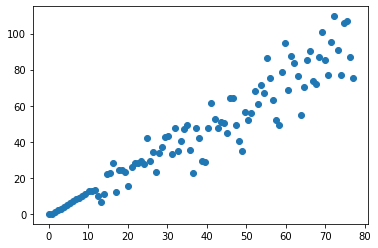

In [56]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,0.1,100)/(K**2)/v,bifurcate_w)

# Malkus-wheel

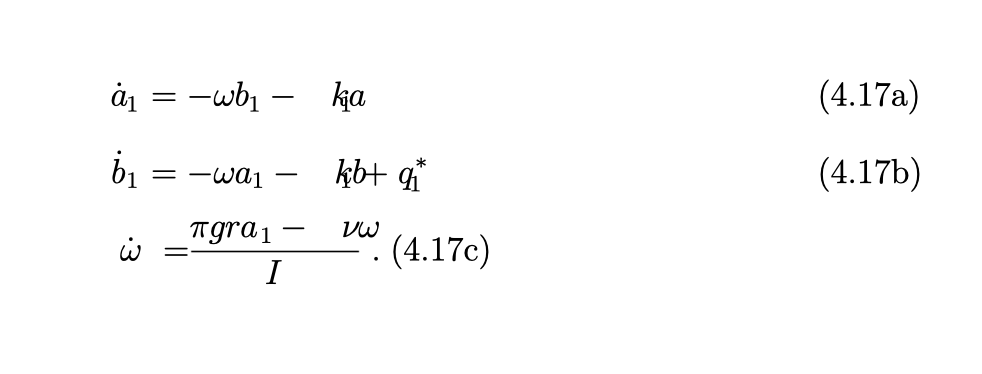

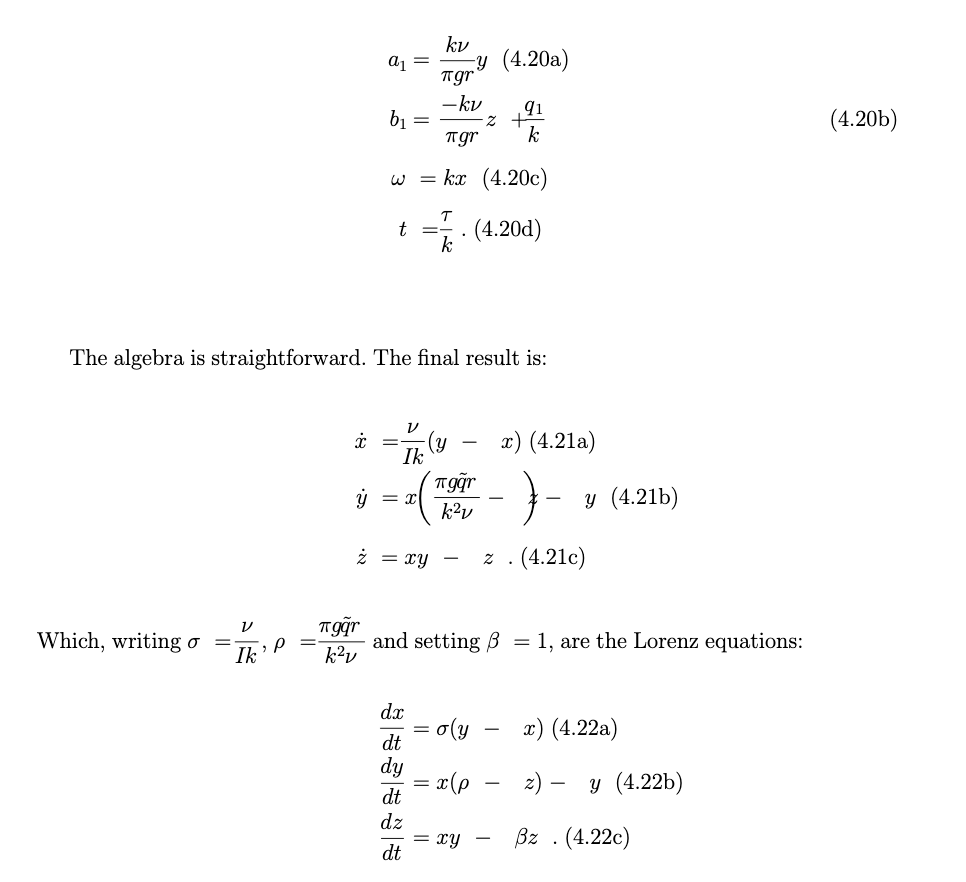

In [61]:
K = 0.2
v = 0.2
r = 0.02
I = 0.1

In [93]:
s = v/I/K
print(s)
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

10.0
bifurcation point should be 17.5


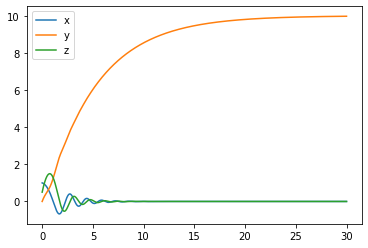

In [87]:
p_list_malkus= RK4_3variable(1,0,0.5,Malkus(q1=2,v=0.2).malkus,0.01,3000)
plt.plot(p_list_malkus[1],p_list_malkus[0][0],label='x')
plt.plot(p_list_malkus[1],p_list_malkus[0][1],label='y')
plt.plot(p_list_malkus[1],p_list_malkus[0][2],label='z')
plt.legend()

In [101]:
bifurcate_w = []
q_list = np.linspace(0,0.1,100)
for q in tqdm(q_list):
    p_list_malkus= RK4_3variable(1,1,1,Malkus(q1=q).malkus,0.01,1000)[0]
    bifurcate_w.append(p_list_malkus[2,1000])

100%|██████████| 100/100 [00:02<00:00, 40.20it/s]


Text(0, 0.5, '$w(10)$')

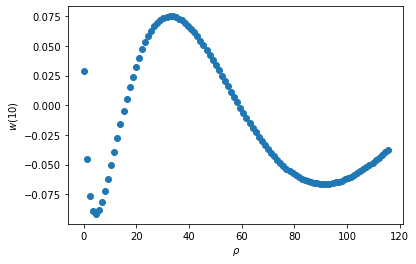

In [109]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,0.3,100)/(K**2)/v,bifurcate_w)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$w(10)$')

Text(0, 0.5, '$w(10)$')

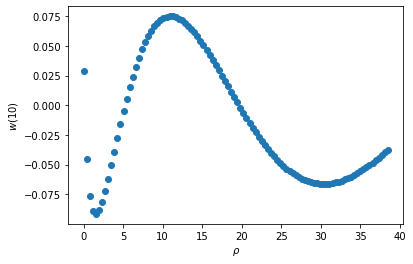

In [110]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,0.1,100)/(K**2)/v,bifurcate_w)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$w(10)$')

In [67]:
p_list_malkus= RK4_3variable(1,1,0.5,Malkus(q1=0.).malkus,0.01,1000)[0]

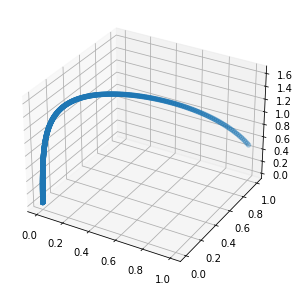

In [68]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0,:],p_list_malkus[1,:],p_list_malkus[2,:])